<a href="https://colab.research.google.com/github/alberthtan/decision-trees/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

Datasets

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

### 1. Building a classification model that predicts the edibility of mushrooms (class variable in the dataset). 


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy

A. Reading the dataset and determining the dependent variable

B. Storing the feature and target variable.

C. Converting all categorical variables into dummy variables

D. Partitioning the data into training and test sets (70/30)

E. Fitting the training data to a classification tree

In [2]:
# A. Reading the Dataset and determining the dependent variable

pd.set_option('display.max_columns', None)
df = pd.read_csv("mushrooms.csv")
print(df.columns.values)
# The dependent variable is class (poisonous or edible)
print("The dependent variable is class (poisonous or edible)")

['class' 'cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor'
 'gill-attachment' 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape'
 'stalk-root' 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type'
 'veil-color' 'ring-number' 'ring-type' 'spore-print-color' 'population'
 'habitat']
The dependent variable is class (poisonous or edible)


In [3]:
# B. Storing the feature and target variable
X1 = df.drop(labels=['class'], axis=1)
y = df['class']

In [4]:
# C. Converting all categorical variables into dummy variables
X = pd.get_dummies(X1)

In [5]:
# D. Partitioning the data into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)


In [6]:
# E. Fitting the training data to a classification tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

2. Printing the confusion matrix. 



[[1263    0]
 [   3 1172]]


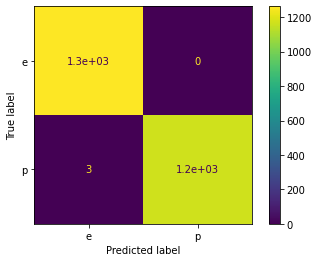

In [7]:
y_pred = dt.predict(X_test)
cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)
metrics.plot_confusion_matrix(dt, X_test, y_test)

3. Printing the accuracy on the training partition

In [8]:
y_pred_train = dt.predict(X_train)
print("Accuracy of training partition:", metrics.accuracy_score(y_train, y_pred_train))

Accuracy of training partition: 1.0


4. Printing the accuracy on the test partition


In [9]:
print("Accuracy of test partion:", metrics.accuracy_score(y_test, y_pred))

Accuracy of test partion: 0.9987694831829368


5. Classification Tree


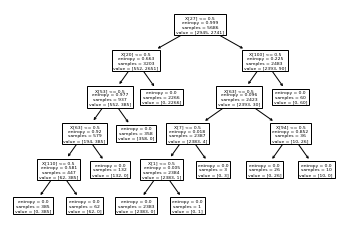

In [10]:
mushroomTree = tree.plot_tree(dt)
plt.savefig('MushroomDT.png')
plt.show()

6. The top three most important features in the decision tree for determining toxicity. 

In [11]:
importance = pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
pd.set_option('display.max_rows', None)
print(importance.sort_values(by=[1], ascending=False).head(3))
print("The three most important features in determining toxicity are odor, bruises, and stalk-root")

                             0         1
27                      odor_n  0.527899
20                   bruises_f  0.212695
63  stalk-surface-below-ring_y  0.076188
The three most important features in determining toxicity are odor, bruises, and stalk-root


7. Classifying the following mushroom.

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [12]:
mushroom = {
    'cap-shape' : 'x',
    'cap-surface' : 's',
    'cap-color' : 'n',
    'bruises' : 't',
    'odor' : 'y',
    'gill-attachment' : 'f',
    'gill-spacing' : 'c',
    'gill-size' : 'n',
    'gill-color' : 'k',
    'stalk-shape' : 'e',
    'stalk-root' : 'e',
    'stalk-surface-above-ring' : 's',
    'stalk-surface-below-ring' : 's',
    'stalk-color-above-ring' : 'w',
    'stalk-color-below-ring' : 'w',
    'veil-type' : 'p',
    'veil-color' : 'w',
    'ring-number' : 'o',
    'ring-type' : 'p',
    'spore-print-color' : 'r',
    'population' : 's',
    'habitat' : 'u'
}
m = pd.Series(mushroom)
X1.append(m, ignore_index=True)
X = pd.get_dummies(X1)
print(dt.predict(X)[-1])
print("The mushroom is edible")

e
The mushroom is edible
